In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

concate both perform feature engineering and then divide them later again.

In [4]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train,test],sort=False)

In [5]:
data.shape

(14204, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [7]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

as Item_Outlet_Sales is the main prediction factor lets see how i

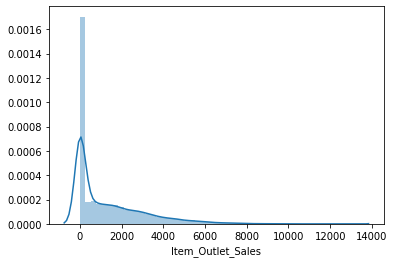

In [8]:
import seaborn as sns
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

Deviate from the normal distribution and 
Having appreciable positive skewness.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

we are with both object type and numerical lets saparate thous 

In [10]:
cat_var = data.select_dtypes(include =[np.object])
cat_var.shape

(14204, 8)

In [11]:
num_var = data.select_dtypes(include=[np.float64])
num_var.shape

(14204, 4)

In [12]:
cat_var.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
source                     0
dtype: int64

in categorical var we have 4016 missing values of Outlet_size and lets check in numerical var

In [13]:
num_var.isnull().sum()

Item_Weight          2439
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

we have 2439 missing values in Item_Weight 

lets see Unique values of each attribute 

In [14]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

by this we can say that there are totally 1559 products and 10 Outlets and there are totally 16 types of Item 

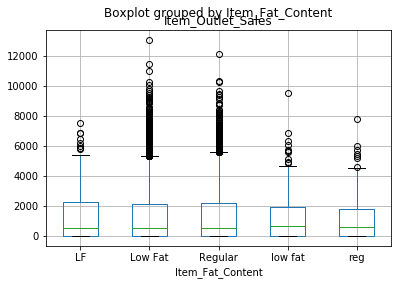

In [15]:
data.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content')

by this we can say that Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

In [16]:
for var in cat_var:
    data[var].fillna(method='ffill',inplace=True)

In [17]:
for var in num_var:
    mean = np.around(np.mean(data[var]))
    data[var].fillna(mean,inplace = True)

In [18]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

we placed all the missing values with mean so by that there is no missing values in data now 

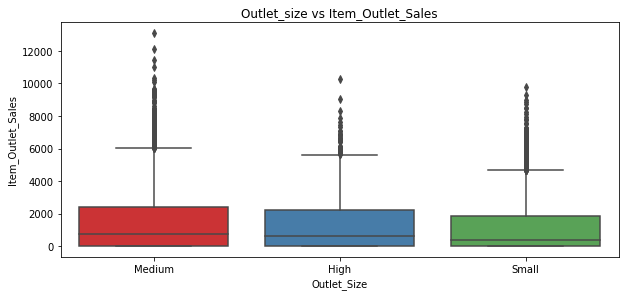

In [19]:
plt.figure(figsize =(10,9))
plt.subplot(311)

ax = sns.boxplot(x = 'Outlet_Size',y = 'Item_Outlet_Sales',data=data ,palette="Set1")
ax.set_title("Outlet_size vs Item_Outlet_Sales")
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

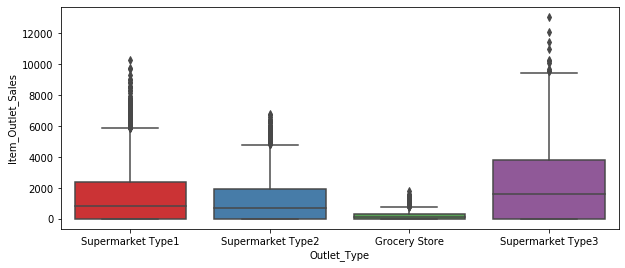

In [20]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Outlet_Type' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

and in our data set one attribute Item_visibility which mean The % of total display area of all products in a store allocated to the particular product but does not make sense with 0 so lets consider it as missing values and impute wirh mean visibility

In [21]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])


if we observer in Item_Identifier there unique key have 'FD' if product is related to food and 'DR' if the product is Drink 
and 'NC' if it is Non_consumable so lets make a new variable by combining them 

In [22]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'food','NC':'Non_consum','DR':'Drink'})
data['Item_Type_Combined'].value_counts()

food          10201
Non_consum     2686
Drink          1317
Name: Item_Type_Combined, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  obje

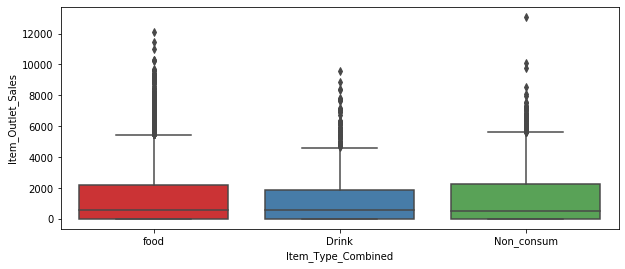

In [24]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Item_Type_Combined' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

In [25]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [26]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

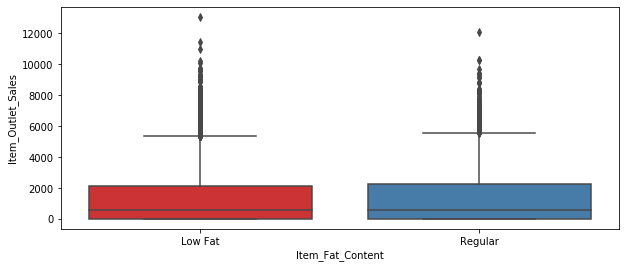

In [27]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Item_Fat_Content' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

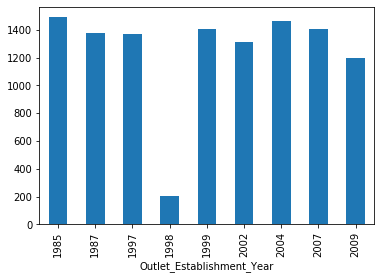

In [28]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

it will make more sense if we have noe many years did the Outlet is being woring for so lets use Outlet_Establishment_Year and make a new attribute Outlet_years this can be done by 

In [29]:
data['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [30]:
data['Outlet_Year'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Year'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Outlet_Year, dtype: float64

as sklearn only accepts only numerical variables, we  converted all categories into numeric types 

In [31]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

data['Outlet'] = encode.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = encode.fit_transform(data[i])

In [32]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
source                        object
Item_Type_Combined             int32
Outlet_Year                    int64
Outlet                         int64
dtype: object

In [33]:
data = pd.get_dummies(data,columns = var_mod)

In [34]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Year                    int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

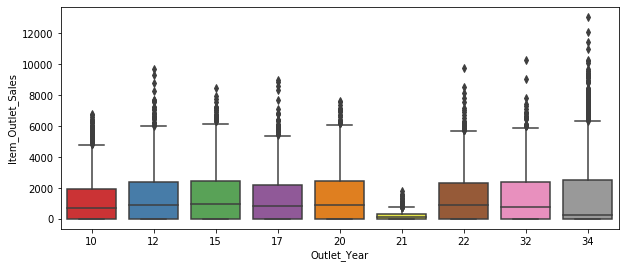

In [35]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Outlet_Year' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

In [36]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [37]:
train.shape , test.shape

((8523, 35), (5681, 35))

Now our data is ready for model building

conclusion ---------

1 . Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
2 . Stores with higher population will have more sales 
3 . Stores located within popular marketplaces should have higher sales because of better access to customers.
4 . Stores with large space . Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place

according to product :

1 . Brand,packaging,Advertising,Visibility in Store,offers will show very good affect on product sales 